# Laboratorio 3
## Inteligencia Artificial
## Seccion 
### Andres de la Roca 20332

In [299]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from utility_funcs import gradient_descent, linear_cost, linear_cost_gradient

### Task 1/1.1
Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un np.array para ser trabajado en el notebook.


In [300]:
'''
Se lee el archivo que contiene el dataset y se guarda dentro de un
dataframe asignado a la variable data
'''
data = pd.read_csv('kc_house_data.csv')

data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [301]:
data_array = data.values # Se almacenan los valores dentro de un numpy array

data_array

array([[7129300520, '20141013T000000', 221900.0, ..., -122.257, 1340,
        5650],
       [6414100192, '20141209T000000', 538000.0, ..., -122.319, 1690,
        7639],
       [5631500400, '20150225T000000', 180000.0, ..., -122.233, 2720,
        8062],
       ...,
       [1523300141, '20140623T000000', 402101.0, ..., -122.299, 1020,
        2007],
       [291310100, '20150116T000000', 400000.0, ..., -122.069, 1410,
        1287],
       [1523300157, '20141015T000000', 325000.0, ..., -122.299, 1020,
        1357]], dtype=object)

### Task 1.2
Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona
las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living).

In [302]:
# Se toma el valor deseado de todos los arrays anidados de data_array
price = data_array[:, 2].astype(int) # Valor a predecir
sqft_living = data_array[:, 5].astype(int) # Valor para entrenar el modelo

In [303]:
sqft_living

array([1180, 2570,  770, ..., 1020, 1600, 1020])

In [304]:
TRAINING_SET_SIZE = len(sqft_living)

sqft_living_X = np.vstack(
    (
        np.ones(TRAINING_SET_SIZE),
        sqft_living,
    )
).T

price_y = price.reshape(TRAINING_SET_SIZE, 1)

m,n = sqft_living_X.shape

theta_0 = np.random.rand(n,1)
theta_0

array([[0.04294946],
       [0.44864674]])

### Task 1.3
Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase).


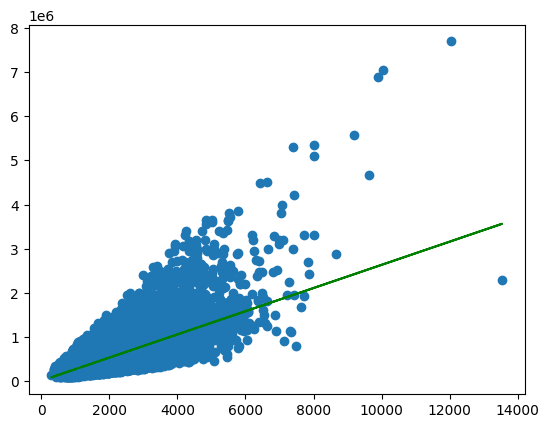

[[7.75107417e-02]
 [2.63089158e+02]]


In [305]:
r_theta, costs, thetas = gradient_descent(
    theta_0 = theta_0,
    cost_function = linear_cost,
    cost_function_gradient=linear_cost_gradient,
    learning_rate=0.000000001,
    threshold=0.001,
    max_iter=10000,
    params = (sqft_living_X, price_y, 1),
)

for test_theta in thetas:
    pass

plt.scatter(sqft_living_X[:, 1], price_y)
plt.plot(sqft_living_X[:, 1], sqft_living_X @ test_theta, color='green')
plt.show()

print(test_theta)

In [306]:
sqft_living_X = sqft_living_X[:, 1].astype(int)

In [307]:
price_y = price_y.reshape(len(price_y),)

### Task 1.4
Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor
balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).


In [309]:
divs = 10 # Numero de divisiones para validacion cruzada

avg_error = np.zeros(10) # Inicializa el error promedio para cada grado polinomico

for i in range(divs):
    # Division en conjuntos de entrenamiento y de prueba
    start, end = i*len(sqft_living_X)//divs, (i+1)*len(sqft_living)//divs
    sqft_living_train = np.concatenate((sqft_living_X[:start], sqft_living_X[end:]))
    price_train = np.concatenate((price_y[:start], price_y[end:]))
    sqft_living_test = sqft_living_X[start:end]
    price_test = price_y[start:end]

    for grado in range(1, 11):

        coef = np.polyfit(sqft_living_train, price_train, grado)
        y_pred = np.polyval(coef, sqft_living_test)
        error = np.mean((y_pred - price_test) ** 2)
        avg_error[grado-1] += error

avg_error /= divs

best_grado = np.argmin(avg_error) + 1

print("El mejor grado de polinomio: ", best_grado)

El mejor grado de polinomio:  8


### Task 1.5
Analisis de hallazgos

El uso del modelo de regresion lineal resulto ser relativamente preciso con los valores dados, como se puede observar en la task 1.3, la linea de tendencia lineal muestra un comportamiento que va bastante de acuerdo con la representacion de la nube de puntos.
Para la validacion cruzada utilizando diferentes grados polinomicos, (10 divisiones en total) se obtuvo que el mejor grado de polinomio que representaria los datos es el grado 8, esto fue descubierto buscando el grado que tuviera menor error de media, buscando la que tuviera una mayor fidelidad en los datos.

Recomendaciones para mejorar modelo a futuro:  
- Se podria utilizar un modelo que itere sobre datos mas diferentes para que de esta manera pueda estar mejor preparado para datos atipicos.
- La exactitud del modelo puede ser aumentada si se tomaran en cuenta mas variables que tuvieran una mayor correlacion con la variable precio, de esta manera la prediccion podria ser mas acertada.
- Se podria utilizar un modelo no lineal para mostrar de una mejor manera el crecimiento de las tendencias y comportamientos de la nube de datos.
